Упражнение №1 

$$ \psi(x, 0 ) = \mathcal{N} e^{-\frac{x^2}{2 \sigma^2}} $$

Найти динамику $\psi(x, t) = ?$, $\rho(x, t) = ?$

Решение: 

$$ C(p) = \braket{\psi_p | \psi_{t = 0}} = \int \limits_{-\infty}^{+\infty} e^{- \frac{i p x}{\hbar}} \psi(x, 0) dx $$

$$ C(p) = \mathcal{N} \int \limits_{-\infty}^{+\infty} e^{-\frac{ipx}{\hbar} - \frac{x^2}{2 \sigma^2}} dx $$

Пусть $a = \frac{p}{\hbar}$, $b = \frac{1}{2 \sigma^2}$, тогда 

$$ -ia(z+ic)-b(z+ic)^2 = -bz^2 + (bc^2 + ac) - iz (2bc + a) \Rightarrow c = -\frac{a}{2b} = - \frac{p \sigma^2}{\hbar} $$
$$ bc^2 + ac = \frac{a^2}{4b^2}b - \frac{a^2}{2b} = - \frac{a^2}{4b} $$

При контуре в виде прямоугольника, стороны которого параллельны осям координат. Горизонтали проходят через $z = 0$, $z = -ic$. Интегралы по боковым сторонам стремятся к 0, при увеличении прямоугольника. Тогда
$$ C(p) = \mathcal{N} \int \limits_{-\infty}^{+\infty} e^{-\frac{ipx}{\hbar} - \frac{(x - x0)^2}{2 \sigma^2}} dx = \mathcal{N} \int \limits_{-\infty}^{+\infty} e^{-bt^2-\frac{a^2}{4b}} dt = \mathcal{N} \sqrt{\frac{\pi}{b}} e^{-\frac{a^2}{4b}} = \mathcal{N} \sqrt{2\pi} \sigma e^{-\frac{p^2 \sigma^2}{2\hbar^2}} e^{- \frac{i p x_0}{h}}$$

$$ \psi(x, t) = \frac{1}{2 \pi \hbar} \int \limits_{-\infty}^{+\infty} C(p) \psi_p e^{- \frac{ip^2 t}{2m \hbar}} dp = \mathcal{N} \sqrt{2\pi} \frac{1}{2 \pi \hbar} \sigma  \int \limits_{-\infty}^{+\infty} e^{-\frac{p^2 \sigma^2}{2\hbar^2}} e^{- \frac{ip^2 t}{2m \hbar}}  e^{\frac{ipx}{\hbar}} dp$$

In [18]:
import pandas as pd
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation

N, sigma = smp.symbols('N, sigma', real=True, positive=True)
x = smp.symbols('x', real=True)
x0 = smp.symbols('x0', real=True, positive=True)
k, m, h, t = smp.symbols('k, m, h, t', real=True, positive=True)

psi_k = 1 / (2 * smp.pi) ** 0.5 * smp.exp(smp.I * k * x)
c_k = N * sigma * smp.exp(- k ** 2 * sigma ** 2 / 2)
expr = psi_k * c_k * smp.exp(- smp.I * h * k ** 2 * t / (2 * m))

res = smp.integrate(expr, (k, -smp.oo, smp.oo)).simplify()
res

Piecewise((0.707106781186547*sqrt(2)*N*sqrt(m)*sigma*exp_polar(I*pi/4)*exp(-m*x**2/(2*(I*h*t + m*sigma**2)))/sqrt(-h*t + m*sigma**2*exp_polar(I*pi/2)), (Abs(arg(-h*t*exp_polar(-I*pi/2)/(m*sigma**2) + 1)) < pi/2) | ((Abs(2*arg(x) + pi) < pi) & (Abs(2*arg(x) - pi) < pi) & (Abs(arg(-h*t*exp_polar(-I*pi/2)/(m*sigma**2) + 1)) <= pi/2))), (0.707106781186547*N*sigma*Integral(exp(k*(-I*h*k*t - k*m*sigma**2 + 2*I*m*x)/(2*m)), (k, -oo, oo))/pi**0.5, True))

Условие 2 выполняется для любого t, значит: 

$$\psi(x, t) = \sqrt{m / 2} \mathcal{N} \sigma (1 + i) e^{-\frac{mx^2}{2(i \hbar t + m \sigma^2)}} \frac{1}{\sqrt{im\sigma^2 - \hbar t}} $$

In [15]:
def psi_0(x, N = 1, sigma = 1):
    return N * np.exp(- x ** 2 / (2 * sigma ** 2))

def psi(x, t, m = 1, h = 1, N = 1, sigma = 1):
    return (2 * m) ** 0.5 * N * sigma * (1 + 1j) * np.exp(- (m * x ** 2) / (2 * (1j * h * t + m * sigma ** 2))) / (1j * m * sigma ** 2 - h * t) ** 0.5 / 2

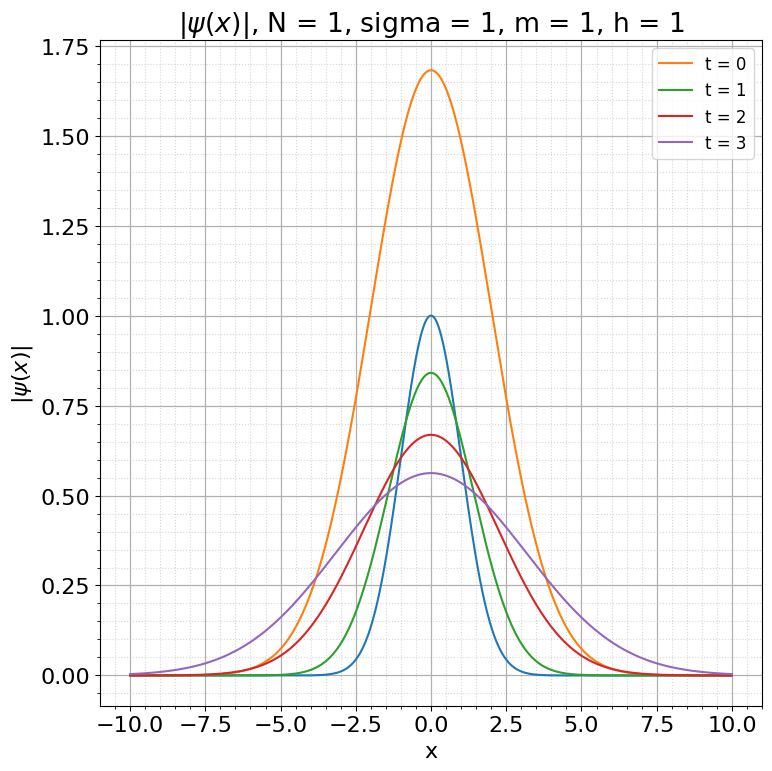

In [16]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта 
plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r'$|\psi(x)|$, N = 1, sigma = 1, m = 1, h = 1')
plt.ylabel(r'$|\psi(x)|$')
plt.xlabel(r"x")

x = np.linspace(-10, 10, 500)
plt.plot(x, psi_0(x))


plt.plot(x, np.abs(psi(x, 0, sigma = 2)), label='t = 0')
plt.plot(x, np.abs(psi(x, 1)), label='t = 1')
plt.plot(x, np.abs(psi(x, 2)), label='t = 2')
plt.plot(x, np.abs(psi(x, 3)), label='t = 3')

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc='best', fontsize = 12) # Активируем легенду графика
plt.show()

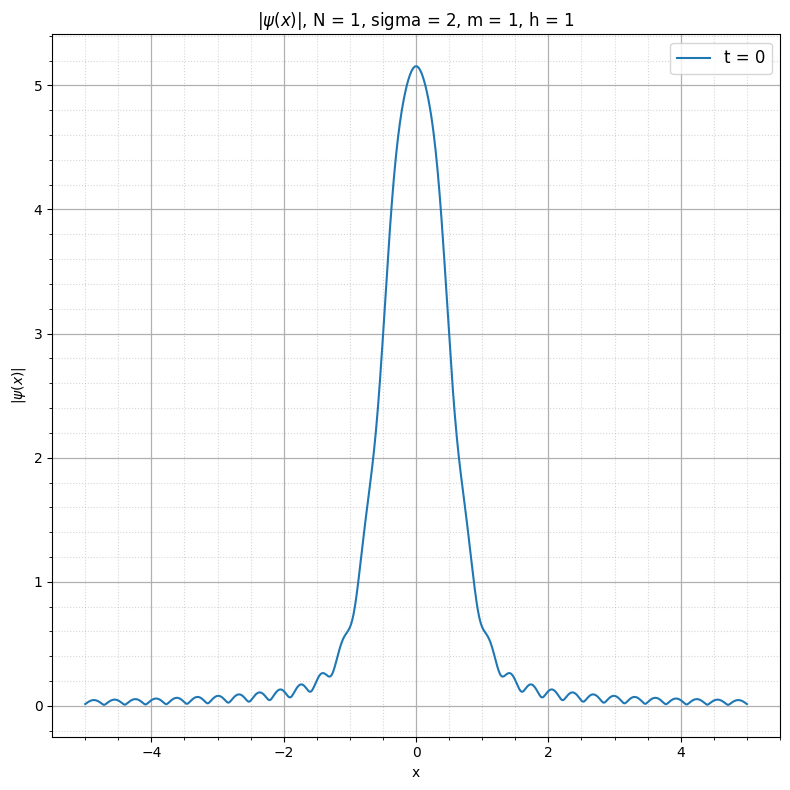

In [5]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта 
plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру
plt.style.use('default')
# Подписываем оси и график
plt.title(r'$|\psi(x)|$, N = 1, sigma = 2, m = 1, h = 1')
plt.ylabel(r'$|\psi(x)|$')
plt.xlabel(r"x")

x = np.linspace(-10, 10, 1000)
k = np.linspace(-5, 5, 1000)

res_0 = []

for i in x:
    res_0.append(psi(i, 10, 1, 1, 1, 2))

res_k = []

delta = x[1] - x[0]
for j in k:
    sum_1 = 0
    for i in range(len(x)):
        sum_1 += res_0[i] * np.exp(-1j * j * x[i]) * delta
    res_k.append(sum_1)


plt.plot(k, np.abs(np.asarray(res_k)), label='t = 0')
# plt.plot(x, res_1, label='t = 1')
# plt.plot(x, res_2, label='t = 2')
# plt.plot(x, res_3, label='t = 3')

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc='best', fontsize = 12) # Активируем легенду графика
plt.show()

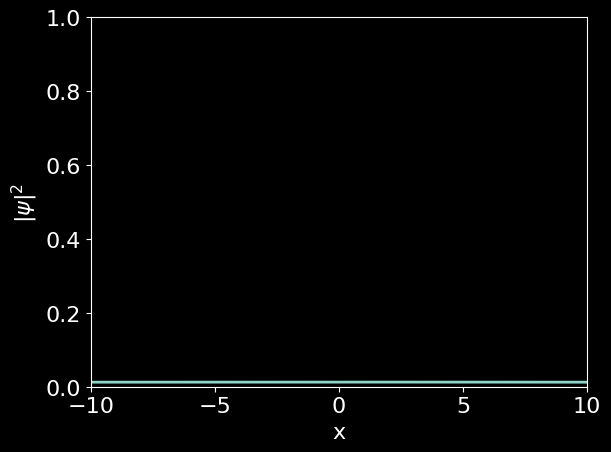

In [13]:
plt.style.use('dark_background')
 
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(0, 1))
line, = ax.plot([], [], lw=2)
ax.set_xlabel("x")
ax.set_ylabel(r"$|\psi|^2$")
 
# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,
 
xdata, ydata = [], []
 
# функция анимации
def animate(i):
    # x, y данные на графике
    x = np.linspace(-10, 10, 1000)
    y = np.abs(psi(x, i / 25)) ** 2
 
    line.set_data(x, y)
    return line,
  
# Вызов анимации.
anim = FuncAnimation(fig, animate, init_func=init, frames=2000, interval=100, blit=True)
 
# Сохраняем анимацию как gif файл
anim.save('evolution.gif', writer='pillow')

Упражнение №2. 

$$\psi(x, 0) = \delta (x - x_0) $$

Найти динамику $\psi(x, t) = ?$, $\rho(x, t) = ?$

Решение: 

$$ E_n = \frac{\hbar^2 \pi^2 n^2}{2 m a^2}, \psi_n = \sqrt{\frac{2}{a}} \sin\left(\frac{\pi n}{a}x \right)$$ 

$$ c_n = \int \limits_{0}^{a} \psi_n \psi(x, 0) dx = \sqrt{\frac{2}{a}} \sin\left(\frac{\pi n}{a} x_0 \right)$$ 

$$ \psi(x, t) = \sum \limits_{n = 1}^{\infty} \frac{2}{a} \sin\left(\frac{\pi n}{a} x_0 \right) \sin\left(\frac{\pi n}{a}x \right) e^{- \frac{i \pi^2 \hbar n^2 t}{2 a^2 m}}

Попробуем проаппроксимировать дельта функцию:

$$\delta(x - x_0) = \begin{cases} \frac{1}{\Delta},  ~~~x_0 - \Delta / 2 < x < x_0 + \Delta / 2 \\
                                   0 \end{cases} $$

In [14]:
import pandas as pd
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation

Delta = smp.symbols('Delta', real=True, positive=True)
x, x_0 = smp.symbols('x, x_0', real=True)
n = smp.symbols('n', integer=True)
a, m, h, t = smp.symbols('a, m, h, t', real=True, positive=True)

psi_n = (2 / a) ** 0.5 * smp.sin(smp.pi * n / a * x)

c_n = smp.integrate(psi_n / Delta, (x, x_0 - Delta / 2, x_0 + Delta / 2)).simplify()


$$ c_n = \sqrt{\frac{2}{a}} \frac{2}{\pi \Delta n} \sin \left(\frac{\pi \Delta n}{2a}\right) \sin \left(\frac{\pi n x_0} {a}\right) $$

In [15]:
expr = c_n * psi_n * smp.exp(-smp.I * h * smp.pi ** 2 * n ** 2 * t / (2 * m * a ** 2))

smp.Sum(expr, (n, 1, smp.oo)).simplify()

Sum(Piecewise((4.0*exp(-I*pi**2*h*n**2*t/(2*a**2*m))*sin(pi*Delta*n/(2*a))*sin(pi*n*x/a)*sin(pi*n*x_0/a)/(pi*Delta*n), Ne(pi*n/a, 0)), (0, True)), (n, 1, oo))

In [16]:
def psi_0(x, x_0 = 5, Delta = 0.001):
    return (np.abs(x - x_0) <= Delta) / Delta

def psi(x, t, x_0 = 5, a = 10, Delta = 0.001, N = 100, m = 1, h = 1):
    n = np.arange(1, N)

    return np.sum(4 * np.exp(- 1j * np.pi ** 2 * h * n ** 2 * t / (2 * a ** 2 * m)) * np.sin(np.pi * Delta * n / (2 * a)) * np.sin(np.pi * n * x / a) * np.sin(np.pi * n * x_0 / a) / (np.pi * Delta * n))

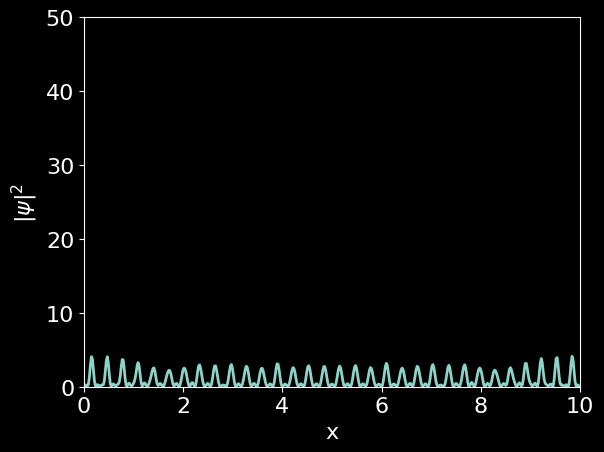

In [17]:
plt.style.use('dark_background')
 
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(0, 50))
line, = ax.plot([], [], lw=2)
ax.set_xlabel("x")
ax.set_ylabel(r"$|\psi|^2$")
 
# Функция инициализации.
def init():
    # создение пустого графа.
    line.set_data([], [])
    return line,

# функция анимации
def animate(i):
    # x, y данные на графике
    x = np.linspace(-10, 10, 1000)
    y = []

    for x_1 in x:
        y.append(np.abs(psi(x_1, i / 1000)) ** 2)

    line.set_data(x, y)
    return line,

# Вызов анимации.
anim = FuncAnimation(fig, animate, init_func=init, frames=500, interval=5, blit=True)
 
# Сохраняем анимацию как gif файл
anim.save('evolution_2.gif', writer='pillow')